In [30]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from typing import List
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_csv('final_house.csv')

df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('Surroundings type', inplace=True, axis=1)
df.drop('Type of property', inplace=True, axis=1)
df.drop('Heating type', inplace=True, axis=1)
df.drop('Locality', inplace=True, axis=1)

def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        # print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df = remove_outliers(df, ['Living area'], 3)
df = remove_outliers(df, ['Surface of the land'], 4)
df = remove_outliers(df, ['Garden surface'], 3)
df = remove_outliers(df, ['Terrace surface'], 3)
# print(df['Living area'].max())
# print(df['Surface of the land'].max())
# df

In [42]:
df_urbain = pd.read_csv('utils/Urbain.csv')
postcode_set = set(df_urbain['Postcode'])
df['Urban_value'] = df['Zip'].apply(lambda x: 1 if x in postcode_set else 0)

In [45]:
# df.isnull().sum().sort_values(ascending=False)

In [47]:
features = list(df.drop(columns=['Zip','Price', 'id','Subtype of property','Energy class','Province'
                                 ]).columns)

X = df[features].to_numpy()
y = df[['Price']].to_numpy().reshape(-1 , 1)

# Instantiate the scaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Normalize the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression() 
lm.fit(X_train, y_train)

#normalize the whole dataset for scoring
X = scaler.transform(X)

score = lm.score(X_test, y_test)
coeff_df = pd.DataFrame(lm.coef_, columns=features)
coeff_df = coeff_df.T
coeff_df.columns = ['Coefficient']
predictions = lm.predict(X_test) 
# coeff_df

(4940, 18)
(8234, 18)
score:
0.5440618876792391
[453079.24757085]


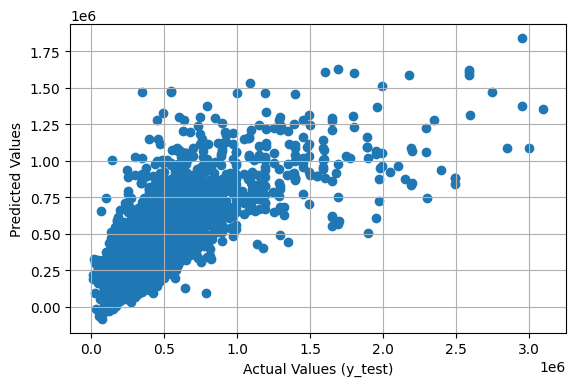

/tmp/ipykernel_706/2522220503.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

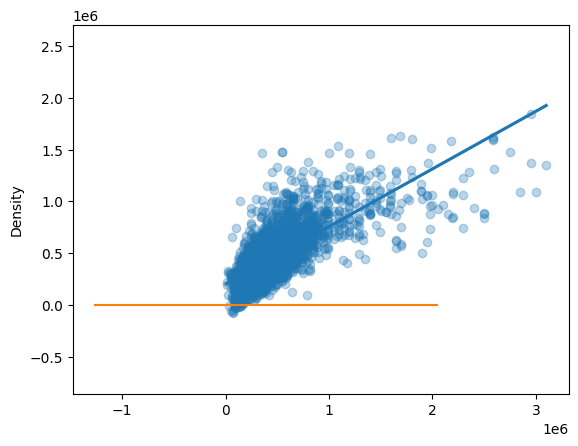

In [51]:
print(X_train.shape)
print(X.shape)

print('score:')
print(score)
print(lm.intercept_)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})
plt.axis('equal')

sns.distplot((y_test-predictions),bins=50)

In [55]:
# df.skew()

In [34]:
'''
'Living area'
'Number of rooms'
'Garden surface'
'Terrace surface'
'Open fire'
'Surface of the land'
'Number of facades'
'Swimming pool'
'Building Cond. values'
'Kitchen values'
'Primary energy consumption'
'Energy efficiency'
'''

"\n'Living area'\n'Number of rooms'\n'Garden surface'\n'Terrace surface'\n'Open fire'\n'Surface of the land'\n'Number of facades'\n'Swimming pool'\n'Building Cond. values'\n'Kitchen values'\n'Primary energy consumption'\n'Energy efficiency'\n"

                         Coefficient
Living area            163248.270199
Surface of the land     46816.255483
Number of rooms         -8265.125515
Bathrooms               76065.661803
Swimming pool           35692.450251
Kitchen values          44546.048759
Building Cond. values   44981.585526
Urban_value             56666.214113


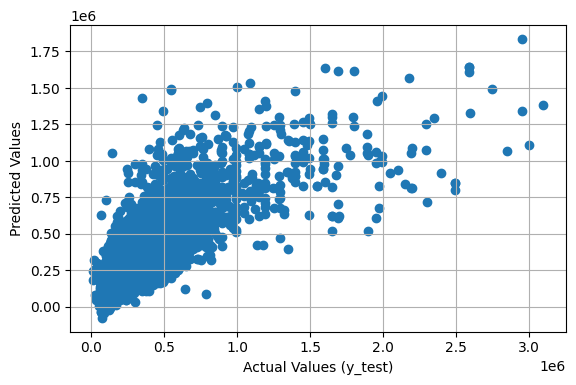

(4940, 8)
(8234, 8)
Score:
0.536485623496803
Intercept:
453079.24757084966


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

features = list(df.drop(columns=['Zip','Price', 'id','Primary energy consumption','Subtype of property','Energy class','Province']).columns)

X = df[features]
y = df['Price']
# Instantiate the scaler
scaler = StandardScaler()
# Feature selection
selector = SelectKBest(score_func=f_regression, k=8)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Normalize the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Fitting the model and making predictions

lm = LinearRegression() 
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Scoring the model
score = lm.score(X_test, y_test)

# Getting selected features
mask = selector.get_support()
selected_features = [feature for feature, boolean in zip(features, mask) if boolean]

# Creating coefficient DataFrame
coeff_df = pd.DataFrame(lm.coef_.reshape(-1, 1), index=selected_features, columns=['Coefficient'])

print(coeff_df)

# Plotting predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

print(X_train.shape)
print(X.shape)

print('Score:')
print(score)
print('Intercept:')
print(lm.intercept_)
